# Exercise Sheet 4: Machine Learning Fundamentals & Linear Regression (Deadline: 01 Dec 23:59)

# ML Fundamentals(7 points)
For theoretical tasks you are encouraged to write in $\\LaTeX$. Jupyter notebooks support them by default. For reference, please have a look at the examples in this short excellent guide: [Typesetting Equations](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Typesetting%20Equations.ipynb)

Alternatively, you can upload the solutions in the written form as images and paste them inside the cells. But if you do this, **make sure** that the images are of high quality, so that we can read them without any problems.

###### 1. Sigmoid Function (1.5 points)
The special case of the logistic function is the *sigmoid function* which is defined as:

\begin{equation*}
  \sigma(a) = \frac{1}{1 + e^{-a}}
\end{equation*}

a) Compute its gradient analytically. (0.5 points)

###### Answer

$$\frac{\partial \sigma(a)}{\partial a} = \frac{\partial}{\partial a} \frac{1}{1 + e^{-a}} = \frac{\partial}{\partial a} (1 + e^{-a})^{-1} = (1 + e^{-a})^{-2} e^{-a} = \frac{e^{-a}}{(1 + e^{-a})^2} = \frac{1}{1 + e^{-a}} \cdot \frac{e^{-a}}{1 + e^{-a}} =\\ \frac{1}{1 + e^{-a}} \cdot \frac{e^{-a}}{e^{a-a} + e^{-a}} = \frac{1}{1 + e^{-a}} \cdot \frac{e^{-a}}{(e^a + 1) e^{-a}} = \frac{1}{1 + e^{-a}} \cdot \frac{1}{e^a + 1} = \sigma(a) \cdot \sigma(-a)$$

b) What are the inherent properties that you observe from the above computed gradient? (0.5 points) <br />
   *Hint: Think about how would the gradient signal be for the whole domain of the sigmoid function*
   
###### Answer

From the above computation we can see, that we finally end with $\sigma(a) \cdot \sigma(-a)$. $\sigma(a)$ is zero or close to zero for (very) negative values and close to 1 for (very) positive values and $\sigma(-a)$ would be the mirrored version of that. So mupltiplying these two functions would result in a function which is close to zero for (very) negative and (very) positive values and has a peek at 0.

c) Prove that the sigmoid function is symmetric. (0.5 points)

###### Answer

The arguments of the sigmoid function do not do any operations between them. So one can just interchange them without changing anything on the function output:

$$\sigma([a_1, a_2, ... , a_n]) = \sigma([a_2, ..., a_n, a_1]) = \sigma([a_2, a_1, ..., a_n]) = \sigma([a_n, a_1, ..., a_2])$$

###### 2. Regularization (3.5 points)

In the lecture, we've seen that we can add a *regularizer* to our cost function to avoid *over or underfitting*. For example, consider the following training criterion for linear regression:

\begin{equation*}
  J(\textbf{w}) = \frac{1}{m}\sum_{i=1}^{m} \Vert\hat{y}^{(i)} - y^{(i)}\Vert^{2} + \lambda\Omega(\textbf{w})
\end{equation*}
where $\Omega(\textbf{w}) = \textbf{w}^{T}\textbf{w}$ is the regularizer.

a) In the above criterion, what is the role of the regularization parameter $\lambda$ on the regularizer (i.e. parameters of our model) while minimizing $J(\textbf{w})$? (1.0 point)

###### Answer

The regularization parameter decides how much the regularizer should be weighted to our final model. I.e. if the weight is higher, then the model is less prone to overfitting because the the model does not put as much weight on the training data. However, if it is too high then the model might underfit. If it is too low then the model might overfit because then the model considers the training data too much and new test data will have a much higher error.

b) Is $\lambda$ the model parameter or a hyperparameter? Justify.(0.5 points)

###### Answer

$\lambda$ is a hyperparameter because it is not changed during the training, unlike $\textbf{w}$. It is also not supposed to change during training because then it would not be able to underfit the model to the training data anymore and would basically become zero because of our loss function.

c) Derive the closed form solution for the weights ($\textbf{w}$) in the above criterion.(2.0 points)

###### Answer

$$J(\textbf{w}) = \frac{1}{m} \|X\textbf{w} - \textbf{y}\|^2 + \lambda\Omega(\textbf{w}) = \frac{1}{m}\|X\textbf{w} - \textbf{y}\|^2 + \lambda \textbf{w}^{T}\textbf{w} = \frac{1}{m}\|\tilde{X}\textbf{w} - \tilde{\textbf{y}}\|^2 \text{ , with } \tilde{X} = \begin{pmatrix}X \\ \sqrt{\lambda} I\end{pmatrix} \text{ and } \tilde{\textbf{y}} = \begin{pmatrix}y\\0\end{pmatrix}$$

\begin{align*}
\frac{1}{m}\|\tilde{X}\textbf{w} - \tilde{\textbf{y}}\|^2 = \frac{1}{m}(\tilde{X}\textbf{w} - \tilde{\textbf{y}})^T (\tilde{X}\textbf{w} - \tilde{\textbf{y}}) &= 0 \Leftrightarrow\\
\textbf{w}^T \tilde{X}^T \tilde{X} \textbf{w} - 2 \textbf{w}^T \tilde{X} \tilde{\textbf{y}} + \tilde{\textbf{y}}^T \tilde{\textbf{y}}&= 0 \Leftrightarrow\\
2 \tilde{X}^T \tilde{X} \textbf{w} - 2 \tilde{X}^T \tilde{\textbf{y}} &= 0 \Leftrightarrow \\
\textbf{w} &= (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^T \tilde{\textbf{y}} \Leftrightarrow \\
\textbf{w} &= (X^T X + \lambda I)^{-1} X^T \textbf{y}
\end{align*}

###### 3. Maximum Likelihood Estimation (MLE) (2 points)
Consider the density function of a ***univariate Gaussian distribution***


\begin{equation*}
 p(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp\left(-\frac{1}{2\sigma^2}(x-\mu)^{2}\right)
\end{equation*}
where $\mu$ is the $\textit{mean}$ and $\sigma^{2}$ is the $\textit{variance}$. 

Let's say you're given *N* samples (i.e. $x_1, x_2, x_3, ..., x_N$) which are drawn from the above stated distribution. Also, you can assume that these samples are **i.i.d** (i.e. [independent and identically distributed](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)).

Now, please derive the *MLE step-by-step* for:

###### Answers

The MLE is given by

$$\mathcal{L}(\mu, \sigma) = \prod_{i=1}^n p(x_i;\mu,\sigma^2) = \left(\frac{1}{2\pi\sigma^2}\right)^{n/2} exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^{2}\right) \Leftrightarrow \log(\mathcal{L}(\mu, \sigma)) = \frac{n}{2} \log\left(\frac{1}{2\pi\sigma^2}\right) - \frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^{2}$$

a) *mean* $(\mu)$. (1.0 point)

For the mean we take the derivative of the above equation with respect to $\mu$ and equate it to zero:

$$0 = \frac{\partial}{\partial \mu} \log(\mathcal{L}(\mu, \sigma)) = 0 - \frac{-2 \sum_{i=1}^n(x_i - \mu)}{2\sigma^2} = \frac{\sum_{i=1}^n(x_i - \mu)}{\sigma^2} = n \left(\sum_{i=1}^n \frac{x_i}{n} - \mu\right) \Leftrightarrow \mu = \sum_{i=1}^n \frac{x_i}{n}$$

b) *variance* $(\sigma^2)$. (1.0 point)

For the variance we take the derivative of the MLE equation with respect to $\sigma$ and equate it to zero:

$$0 = \frac{\partial}{\partial \sigma} \log(\mathcal{L}(\mu, \sigma)) = -\frac{n}{\sigma} + \sigma^{-3} \sum_{i=1}^n (x_i - \mu)^2 = -\frac{n}{\sigma} + \frac{\sum_{i=1}^n (x_i - \mu)^2}{\sigma^3} = -\frac{\sigma^2 n}{\sigma^3} + \frac{\sum_{i=1}^n (x_i - \mu)^2}{\sigma^3} = \\
\frac{-\sigma^2 n + \sum_{i=1}^n (x_i - \mu)^2}{\sigma^3} = -\sigma^2 n + \sum_{i=1}^n (x_i - \mu)^2 \Leftrightarrow \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$

# Multiple Linear Regression (13 points)

#### 1. Introduction
As we have seen in first assignment sheet, when we have one independent (or explanatory) variable and a scalar dependent variable, it is called **simple linear regression**.
But, when there are more than one explanatory variable (i.e. $x^{(1)}, x^{(2)}, ...,x^{(k)}$), and a single scalar dependent variable (*y*), then it's called $\textit{multiple linear regression}$. (Please don't confuse this with *multivariate linear regression* where we predict more than one (correlated) dependent variable.)

Here, we will implement a **multiple linear regression** model in Python/NumPy using the *Gradient Descent* algorithm. Particularly, we will be using $\textit{stochastic gradient descent}$ (*SGD*) where one performs the update step using a small set of training samples of size *batch_size* which we will set to 64. This is again a hyperparameter but in this exercise we will just use a fixed batch-size of *64* (i.e. we go through the training samples sampling 64 at a time and perform gradient descent.) Such a procedure is sometimes called *mini-batch gradient descent* in the deep learning community.

Going through all the training samples *once* is called an **epoch**. Ideally, the algorithm has to go through multiple epochs over the training samples, each time shuffling it, until a convergence criterion has been satisfied. <br />

Here, we will set a *tolerance value* for the difference in error (i.e. change in MSE values between subsequent epochs) that we will accept. Once this difference falls below the *tolerance value*, we terminate our training phase and return the parameters. 

We repeat the above training procedure for all possible hyperparameter combinations. Later on, using these parameters (*i.e. weight vectors*), we compute the prediction for validation data and the corresponding MSE values. And then, we pick the hyperparameter combination which yielded the least MSE.

As a next step, we will combine training data and validation data and make it as our *new training data*. We keep the test data as it is. Using the hyperparameter combination (for the least MSE) that we found above, we train the model again with the *new training data* and obtain the parameter (*i.e. weight vector*) after convergence according to our *tolerance value*.

Phew! That will be our much desired *weight vector*. This is then used on the *test data*, which has not been seen by our algorithm so far, to make a prediction. The resulting MSE value will be the so-called [*generalization error*](https://en.wikipedia.org/wiki/Generalization_error).

It is this *generalization error* that we want it to be as low as possible for *unseen data* (implies that we can achieve higher accuracy).

#### 2. Dataset
For our task, we will be using the *Wine Quality* dataset and predict the quality of white wine based on 11 features such as acidity, citric acid content, residual sugar etc. .

In [1]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get data
data_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data = pd.read_csv(data_url, sep=';')

# inspect data
print(data.head())
print(data.shape)

# data as np array
data_npr = data.values

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

#### 3. Loss function
We will use a *regularized* form of the MSE loss function. In matrix form it can be written as follows:

\begin{equation*}
    J(\textbf{w}) = \frac{1}{2} \Vert{X\textbf{w}-\textbf{y}}\Vert^{2} + \frac{\lambda}{2}\Vert{\textbf{w}}\Vert^{2}
\end{equation*}

It's important to note that, in the above equation, $X$, called *design matrix*, is the horizontal concatenation of shape *(batch_size, num_features)* according to the *order* of the polynomial. To make things easier, you can add the *bias* term as the first column of $X$. Take care to have the *weight* vector $\textbf{w}$ with matching dimensions.

$\textit{Hint}$: see [Design_matrix#Multiple_regression](https://en.wikipedia.org/wiki/Design_matrix#Multiple_regression) for how $X$ with 2 features looks like for $1^{st}$ degree polynomial.

a) Derive the gradient (w.r.t $\textbf{w}$) for the regularized loss function given in **3**. (1.0 point)

##### Answer

$$\frac{\partial J(\textbf{w})}{\partial \textbf{w}} = X^T \|X \textbf{w} - \textbf{y}\| + \lambda \textbf{w}$$

#### 4. Matrix format for higher order polynomial

Written in matrix form, linear regression model for second order would look like: <br />
$$\hat{\textbf{y}} = X\textbf{w}_{1} + X^{2}\textbf{w}_{2} + \textbf{b}$$

where $X^{2}$ is the element-wise squaring of the original design matrix $X$, $\textbf{w}_1$ and $\textbf{w}_2$ are the *weight* vectors, and **b** is the *bias* vector.

a) Now, please write down the matrix format for a $9^{th}$ order linear regression model (0.5 points)

##### Answer

$$\hat{\textbf{y}} = \textbf{b} + \sum_{i=1}^p X^{i} \textbf{w}_i \text{ , with }p = 9$$

#### 5. Hyperparameters
we will experiment with three hyperparameters:

i) regularization parameter $\lambda$ <br />
ii) learning rate $\epsilon$ <br />
iii) order of polynomial *p*

And do a grid search over the values that these hyperparameters can take in order to select the best combination (i.e. the one that achieves lowest test error). This approach is called **hyperparameter optimization or tuning**.

In [2]:
polynomial_order = [1, 5, 9]
learning_rates = [1e-5, 1e-8]
lambdas = [0.1, 0.8]

#hyperparams combination
comb_gen = itertools.product(*(polynomial_order, learning_rates, lambdas))
hparams_comb = list(comb_gen)

batch_size = 64

#### 6. Normalization
First of all, inspect the data, and understand its structure and features. Ideally, before starting to train our learning algorithm, we would want the data to be normalized. Here, we normalize the data (i.e. normalize each column) using the formula:

\begin{equation*}
  norm\_x_i = \frac{x_i - min(x)}{max(x) - min(x)}
\end{equation*}
where $x_i$ is the $i^{th}$ sample in feature $x$

a) Complete the following function which performs normalization (i.e. normalizes columns of $X$). (0.5 points)

In [3]:
def data_normalization(data):
    # TODO: implement
    col_mins = data.values.min(0)
    data_normalized = (data.values - col_mins)/(data.values.max(0) - col_mins)
    return data_normalized


# perform data normalization
data_normalized = data_normalization(data)
data_npr = data_normalized

In [4]:
def split_data(data_npr):
    # (in-place) shuffling of data_npr along axis 0
    np.random.shuffle(data_npr)

    n_tr = 3898
    n_va = n_tr + 500
    n_te = n_va + 500
    
    X_train = data_npr[0:n_tr, 0:-1]
    Y_train = data_npr[0:n_tr, -1]
    
    X_val = data_npr[n_tr:n_va, 0:-1]
    Y_val = data_npr[n_tr:n_va, -1]
    
    X_test = data_npr[n_va:, 0:-1]
    Y_test = data_npr[n_va:, -1]
    
    return [(X_train, Y_train), (X_val, Y_val), (X_test, Y_test)]


# shuffle only the training data along axis 0
def shuffle_train_data(X_train, Y_train):
    """called after each epoch"""
    perm = np.random.permutation(len(Y_train))
    Xtr_shuf = X_train[perm]
    Ytr_shuf = Y_train[perm]
    
    return Xtr_shuf, Ytr_shuf

###### 7. Implementation of required functions

Complete the following function which computes the MSE value. (0.5 point) <br />
(i.e. just a vanilla version of it.) That is, you can ignore the regularization term and also the constants $\frac{1}{2}$

In [5]:
def compute_mse(prediction, ground_truth):
    # TODO: implement
    D = prediction - ground_truth
    mse = 1.0/len(ground_truth) * (D.T * D)
    return mse

Implement a function which computes the prediction of your model. (0.5 point)

In [6]:
def get_prediction(X, W):
    # TODO: implement
    Yhat = X * W
    return Yhat

Implement a function which computes the gradient of your loss function. (1.0 point) <br />
*Hint: Just implementing the gradient computed in **3.** (a)*

In [7]:
def compute_gradient(X, Y, Yhat, W, lambda_):
    # TODO: implement
    gradient = X.T * (Yhat - Y) + lambda_ * W
    return gradient

Implement a function which performs a single update step of SGD. (0.5 point)

In [8]:
# Hint: avoid in-place modification
def sgd(gradient, lr, cur_W):
    # TODO: implement
    new_W = cur_W - lr * gradient
    return new_W

Complete the following function which reformats your data as a design matrix. (0.5 point)

In [9]:
# concatenate X acc. to order of polynomial; likewise do it for W
# where X is design matrix, W is the corresponding weight vector
# [1 X X^2 X^3], [1 W1 W2 W3].T
def prepare_data_matrix(X, W, order):
    # TODO: implement
    X_mat = np.matrix(np.column_stack((np.ones((X.shape[0], 1)), np.concatenate([np.power(X,i+1) for i in range(order)], axis=1))))
    W_vec = None
    if W != None:
        W_vec = np.matrix(np.concatenate(([1], np.concatenate([W for i in range(order)])))).T
    return X_mat, W_vec

###### 8. Training
Complete the code in the following cell such that it performs **mini-batch gradient descent** on the training data for all possible hyperparameter combinations. (4.0 points)

Note: You can also define a function, named appropriately, which performs training. But, take care to do correct bookkeeping of hyperparameter combinations, weight vectors, and the MSE values.

In [10]:
splits = split_data(data_npr)
X_train, Y_train, X_val, Y_val, X_test, Y_test = itertools.chain(*splits)

# cast to numpy matrices for easier calculation
X_train = np.matrix(X_train)
Y_train = np.matrix(Y_train).T
X_val = np.matrix(X_val)
Y_val = np.matrix(Y_val).T
X_test = np.matrix(X_test)
Y_test = np.matrix(Y_test).T

tolerance = 1e-6
start = 1

# initialize weight vector from normal distribution
# TODO: implement
w_shape = X_train.shape[1]
W_init = np.random.randn(w_shape)

# cache weights for each hyperparam combination
# TODO: implement
weights_hist = list()

# keep track of MSE for each hparam combination. will be useful for plotting
# TODO: implement

def train(X_train, Y_train, W_init, order, lr, lamb):
    # initialize necessary stuffs
    # TODO: implement
    mse_hist = [np.Inf]
    
    nsamples = Y_train.shape[0]

    # design matrix needed at this point
    # use the function that we defined above
    # TODO: implement
    X_mat, W_vec = prepare_data_matrix(X_train, W_init, order)

    epochs = 1
    # goes through multiple epochs
    while True:
        # good idea to shuffle the train data
        # TODO: implement
        X_mat, Y_mat = shuffle_train_data(X_mat, Y_train)

        # some more initialization
        # TODO: implement
        bs = batch_size

        # goes through 1 epoch
        while bs < nsamples:
            # complete code for 1 epoch
            # TODO: implement
            X_batch = X_mat[(bs-batch_size):bs, :]
            Y_batch = Y_mat[(bs-batch_size):bs, :]
            Yhat = get_prediction(X_batch, W_vec)
            gradient = compute_gradient(X_batch, Y_batch, Yhat, W_vec, lamb)
            W_vec = sgd(gradient, lr, W_vec)
            bs += batch_size


        # after each epoch
        # get prediction for whole X_train
        # compute the MSE
        # might need to do bookkeeping of mse values as well
        prediction = get_prediction(X_mat, W_vec)
        mse_hist.append(compute_mse(prediction, Y_mat))

        # stopping/convergence criterion
        # check whether diff-in-mse < tolerance
        # TODO: implement
        if abs(mse_hist[epochs - 1] - mse_hist[epochs]) < tolerance:
            # cache weight vector for later use
            # but we also need the hparam combination
            # TODO: implement
            weights_hist.append(W_vec)
            print("order: {} , learning rate: {} , regularizer: {} ".format(order, lr, lamb))
            print("Convergence after epoch {} with MSE {}".format(epochs, mse_hist[epochs]), "\n")
            return W_vec, mse_hist
        epochs += 1
        

# find optimal hyperparameters
for order in polynomial_order:
    for lr in learning_rates:
        for lamb in lambdas:
            train(X_train, Y_train, W_init, order, lr, lamb)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


order: 1 , learning rate: 1e-05 , regularizer: 0.1 
Convergence after epoch 1343 with MSE [[ 0.02444883]] 

order: 1 , learning rate: 1e-05 , regularizer: 0.8 
Convergence after epoch 260 with MSE [[ 0.05816053]] 

order: 1 , learning rate: 1e-08 , regularizer: 0.1 
Convergence after epoch 4858 with MSE [[ 0.12740667]] 

order: 1 , learning rate: 1e-08 , regularizer: 0.8 
Convergence after epoch 183 with MSE [[ 0.13126102]] 

order: 5 , learning rate: 1e-05 , regularizer: 0.1 
Convergence after epoch 953 with MSE [[ 0.03202227]] 

order: 5 , learning rate: 1e-05 , regularizer: 0.8 
Convergence after epoch 1916 with MSE [[ 0.02267021]] 

order: 5 , learning rate: 1e-08 , regularizer: 0.1 
Convergence after epoch 10044 with MSE [[ 1.07144197]] 

order: 5 , learning rate: 1e-08 , regularizer: 0.8 
Convergence after epoch 14668 with MSE [[ 0.96274507]] 

order: 9 , learning rate: 1e-05 , regularizer: 0.1 
Convergence after epoch 1880 with MSE [[ 0.03705651]] 

order: 9 , learning rate: 1e-

Complete the following function which selects the best hyperparameter combination (i.e. the one that gives lowest MSE on **validation data**). (0.5 point)

In [11]:
# find hparams of minimum MSE on Validation data
def find_best_hparams(weights_hist):
    # TODO: implement
    mse_best = np.Inf
    for (w, weights) in enumerate(weights_hist):
        X_val_mat, _ = prepare_data_matrix(X_val, None, hparams_comb[w][0])
        prediction = get_prediction(X_val_mat, weights)
        mse = compute_mse(prediction, Y_val)
        print(mse)
        if mse < mse_best:
            mse_best = mse
            hpm_best = hparams_comb[w]
    return hpm_best, mse_best

best_hpm_combination, best_mse = find_best_hparams(weights_hist)
print(best_hpm_combination, best_mse)

[[ 0.02894216]]
[[ 0.08439682]]
[[ 0.18124298]]
[[ 0.18354501]]
[[ 0.03436655]]
[[ 0.02257884]]
[[ 1.44900695]]
[[ 1.30787795]]
[[ 0.03271861]]
[[ 0.0944039]]
[[ 3.17465951]]
[[ 3.05912815]]
(5, 1e-05, 0.8) [[ 0.02257884]]


###### 9. Re-Training on Train + Validation data
Complete the following function which does re-training on the combined training and validation data. (**1 point**)

In [12]:
# re-run the training on X_train + X_val combined
# Later test it on X_test; That will be our best possible MSE on test data
# this will be more or less the same training code as you did above
# but, here we just have only one value for each hyperparameter.
print(*best_hpm_combination)
# TODO: implement
W_best, mse_hist = train(np.concatenate([X_train, X_val]), np.concatenate([Y_train, Y_val]), W_init, *best_hpm_combination)

5 1e-05 0.8


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


order: 5 , learning rate: 1e-05 , regularizer: 0.8 
Convergence after epoch 1219 with MSE [[ 0.02354027]] 



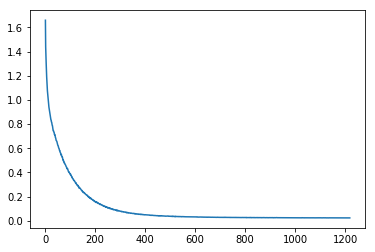

In [13]:
# plot the convergence of MSE values using matplotlib
# i.e. #epochs on X-axis and MSE values on Y-axis
# TODO: implement

plt.plot(mse_hist)

###### 10. Evaluation on Test set
Evaluate your model on test data. (1.0 point)

**Please note that you should keep X_test undisturbed throughout this whole phase.** Else restart the kernel and start from beginning. The whole point of this exercise would not make sense if test data has been *seen in training*.

In [14]:
# finally!!!
# test it on X_test with the Weight vector that you found above
# this will be the generalization error of our model!!
# TODO: implement

X_test_mat, _ = prepare_data_matrix(X_test, None, best_hpm_combination[0])
prediction = get_prediction(X_test_mat, W_best)
mse_test = compute_mse(prediction, Y_test)[0, 0]

print("Finally!!! MSE achieved on X_test is : {}".format(round(mse_test, 6)))

Finally!!! MSE achieved on X_test is : 0.02277


###### 11. Results
Please report the following

a) MSE value on Test data. (0.5 points)

###### Answer

We got an MSE of around 0.02 on the test data.

b) Which hyperparameter combination turned out to be the best? In your understanding, why do you think such a combination turned out to be the best for this task? (1.0 point)

##### Answer

The best hyperparameter combination that turned out to be best was (5, 1e-05, 0.8). This combination may have turned out to be the best because a polynomial order of 5 does not underfit the training data too much (like a first order polynomial) but it also does not overfit too much like a 9th order polynomial would. Furthermore, a high regularization parameter is also helping not to overfit. A higher step size helps for faster convergence (unless it is so high that it overshoots).

# Bonus (2 points)

Now, please repeat the whole *training, validation, re-training, and testing* procedure that we talked about above with the following hyperparameter combination:

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


order: 1 , learning rate: 0 , regularizer: 0 
Convergence after epoch 4119 with MSE [[ 0.13237668]] 

Finally!!! MSE achieved on X_test is : 0.178768


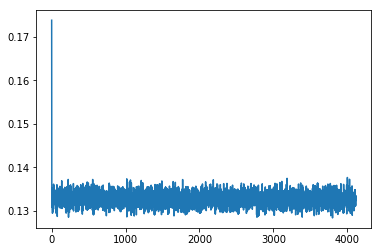

In [15]:
polynomial_order = [1]
learning_rates = [0.1]
lambdas = [0.1]

hpm_combo = np.array([polynomial_order, learning_rates, lambdas], dtype=np.int32).flatten()

W_best, mse_hist = train(np.concatenate([X_train, X_val]), np.concatenate([Y_train, Y_val]), W_init, *hpm_combo)

plt.plot(mse_hist)

X_test_mat, _ = prepare_data_matrix(X_test, None, hpm_combo[0])
prediction = get_prediction(X_test_mat, W_best)
mse_test = compute_mse(prediction, Y_test)[0, 0]

print("Finally!!! MSE achieved on X_test is : {}".format(round(mse_test, 6)))

What are your observations during the training phase? Please explain why such a behaviour happened.

#### Answer

The loss does not converge because the learning rate is so big that it overshoots a local minimum and stochastic gradient descent starts diverging.

## Submission instructions
You should provide a single Jupyter notebook as the solution. The naming should include the assignment number and matriculation IDs of all members in your team in the following format:
**assignment-4_matriculation1_matriculation2_matriculation3.ipynb** (in case of 3 members in a team). 
Make sure to keep the order matriculation1_matriculation2_matriculation3 the same for all assignments.

Please submit the solution to your tutor (with **[NNIA][assignment-4]** in email subject):
1. Maksym Andriushchenko <s8mmandr@stud.uni-saarland.de>
2. Marius Mosbach <s9msmosb@stud.uni-saarland.de>
3. Rajarshi Biswas <rbisw17@gmail.com>
4. Marimuthu Kalimuthu <s8makali@stud.uni-saarland.de>

Note: **If you are in a team, please submit only 1 solution to only 1 tutor.**